# Color Your Emotion

The purpose of this IPython notebook is to provide a markdown document for the code written for the insight project titled with ***"color your emotion"***. 

Description and report regarding this project can be found at **http://coloryouremotion.com**

Any question or concern is welcome to forward to **lanyiyun@gmail.com**

- Author: Yiyun Lan
- Date: Jun, 2016

===========================================================================================================
### This document only includes the main function. Please refer to the other IPython file for modules.

- Module located at: ***/Users/lanyiyun/Documents/Insight Project/Github***


- The file consists four modules:
  - module 1: data preprocessing (dataprep.py)
  - module 2: explorative analysis for the event data (events.py)
  - module 3: explorative analysis for the user data (users.py)
  - module 4: prediction model (prediction.py)



In [1]:
import sys

In [2]:
# append the path where modules are located
sys.path.append("/Users/lanyiyun/Documents/Insight Project/Github")

In [3]:
import pandas as pd
import dataprep
import events
import users
import prediction
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

/Users/lanyiyun/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/lanyiyun/anaconda/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


## Data Loading and Cleansing 

In [4]:
# create events instance
dp_events_SB = dataprep.Events('Stanbridges')

In [5]:
# extract events and convert them into dataframe 
dp_events_SB.dataprep()

In [6]:
dp_events_SB.df.head()

,user_id,browser,city,country,device_type,domain,landing_page,event_name,time,session_time,path,platform
0,4305745796442202,Chrome 48.0.2564,Lewes,United States,Desktop,stanbridge.emotenow.com,stanbridge.emotenow.com/teacher/,Modified time of Emote,1454747666148,1454744465860,/back/bell-schedules,Mac OS X 10.10.5
1,4305745796442202,Chrome 48.0.2564,Lewes,United States,Desktop,stanbridge.emotenow.com,stanbridge.emotenow.com/teacher/,Modified time of Emote,1454747674196,1454744465860,/back/bell-schedules,Mac OS X 10.10.5
2,4305745796442202,Chrome 48.0.2564,Lewes,United States,Desktop,stanbridge.emotenow.com,stanbridge.emotenow.com/teacher/,Modified time of Emote,1454747680207,1454744465860,/back/bell-schedules,Mac OS X 10.10.5
3,4305745796442202,Chrome 48.0.2564,Lewes,United States,Desktop,stanbridge.emotenow.com,stanbridge.emotenow.com/teacher/,Modified time of Emote,1454747682213,1454744465860,/back/bell-schedules,Mac OS X 10.10.5
4,4305745796442202,Chrome 48.0.2564,Lewes,United States,Desktop,stanbridge.emotenow.com,stanbridge.emotenow.com/teacher/,Modified time of Emote,1454747694243,1454744465860,/back/bell-schedules,Mac OS X 10.10.5


In [8]:
dp_events_SB.describe_null()

,data type,missing percentage,total missing values
user_id,int64,0.000000,0
browser,object,0.011522,909
city,object,0.067042,5289
country,object,0.012181,961
device_type,object,0.011522,909
domain,object,0.003828,302
landing_page,object,0.025111,1981
event_name,object,0.000000,0
time,object,0.000000,0
session_time,object,0.011522,909


### dataframe contains missing values

In [9]:
# remove all the missing values
dp_events_SB.dataprep(remove_NULL=True)

In [10]:
dp_events_SB.describe_null()

,data type,missing percentage,total missing values
user_id,int64,0.0,0
browser,object,0.0,0
city,object,0.0,0
country,object,0.0,0
device_type,object,0.0,0
domain,object,0.0,0
landing_page,object,0.0,0
event_name,object,0.0,0
time,object,0.0,0
session_time,object,0.0,0


### missing values have been successfully removed
### suggestion: consider the impact of removing missing values on the result if the percentage is not small

In [11]:
dp_events_SB.df.shape

(72522, 12)

In [12]:
dp_events_SB.df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72522 entries, 0 to 108740
Data columns (total 12 columns):
user_id         72522 non-null int64
browser         72522 non-null object
city            72522 non-null object
country         72522 non-null object
device_type     72522 non-null object
domain          72522 non-null object
landing_page    72522 non-null object
event_name      72522 non-null object
time            72522 non-null object
session_time    72522 non-null object
path            72522 non-null object
platform        72522 non-null object
dtypes: int64(1), object(11)
memory usage: 7.2+ MB


In [13]:
# create events instance for two other schools
dp_events_BK = dataprep.Events('Brooklyn')
dp_events_NE = dataprep.Events('NewEn')
dp_events_BK.dataprep()
dp_events_NE.dataprep()

In [14]:
dp_events_BK.dataprep(remove_NULL=True)
dp_events_NE.dataprep(remove_NULL=True)

In [15]:
# concatenate all the data into one dataframe
dp_events = dp_events_SB
dp_events.df = pd.concat([dp_events_SB.df,dp_events_BK.df,dp_events_NE.df])

In [16]:
# save to SQL
dp_events.save()

In [17]:
# reload
dp_events = dataprep.Events('Stanbridges')
dp_events.df = dp_events.load()

### Exploratory Analysis: User Behavior on Emote App

In [20]:
%matplotlib inline

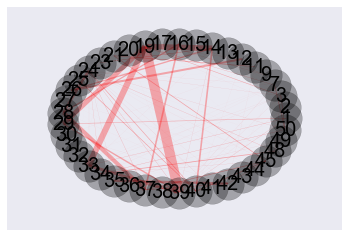

In [21]:
events.draw_webnet(dp_events.df, user_type = 'active', traffic_direction = False, interested_node = {})

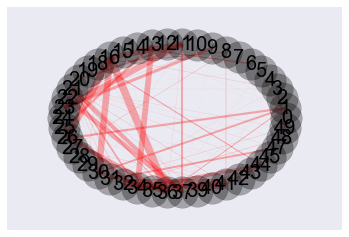

In [22]:
events.draw_webnet(dp_events.df, user_type = 'nonactive', traffic_direction = False, interested_node = {})

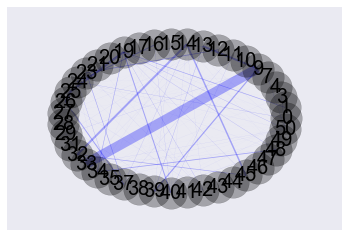

In [23]:
events.draw_webnet(dp_events.df, user_type = 'active', traffic_direction = True, interested_node = {})

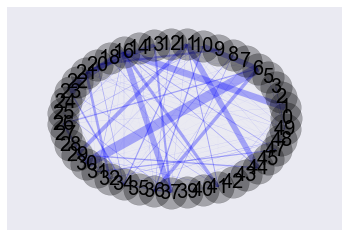

In [24]:
events.draw_webnet(dp_events.df, user_type = 'nonactive', traffic_direction = True, interested_node = {})

In [25]:
[users_not_submit_emote, users_submit_emote] = events.segment_emote_users(dp_events.df)
[active_user_ID, non_active_user_ID] = events.find_active_IDs(users_submit_emote)
[active_df, nonactive_df] = events.segment_active_users(users_submit_emote, active_user_ID, non_active_user_ID)

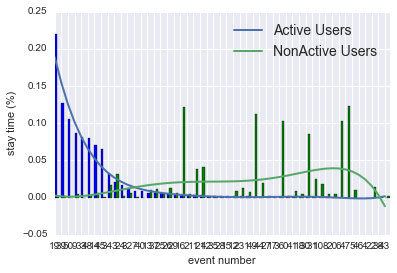

In [26]:
# draw user stay time on each event
events.draw_stay_time(active_df, nonactive_df)

/Users/lanyiyun/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


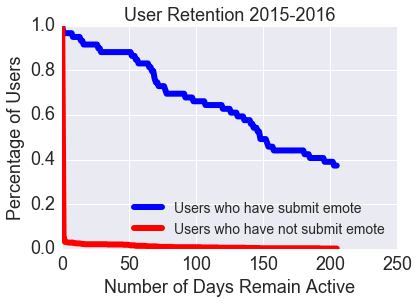

In [27]:
users.draw_user_retention(dp_events.df)

### Build Model to Predict User Drop-off

### Challenges
- Unlabeled users
- Small data set
- Possibly unbalanced
- No metadata
- Need to engineer features

### Solutions
- Labeled users with active ratio
- Cross-validation
- Leave it since it's not very seriously unbalanced
- Use as many events data as possible
- Engineered 11 features


### Use active ratio (i.e., how often one user log in the app with a range of [0,1], 0 means never, 1 means every day]
- 0.1, 0.55, 0.9 were selected to segment and label users into 4 groups
- Group 1: [0-0.1]
- Group 2: [0.1-0.55]
- Group 3: [0.55-0.9]
- Group 4: [0.9-1]

In [28]:
# obtain users (with labels) for prediction
User_4_pred = prediction.get_users(users_submit_emote)

In [29]:
# define and add feature column to the data frame
User_4_pred = prediction.define_features(User_4_pred, users_submit_emote)

### data set is unbalanced, the unbalanced ratio approximately ranges from 1 to 3

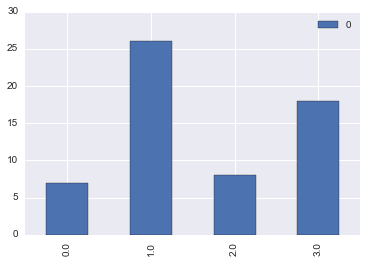

In [30]:
from collections import Counter
label_counts = Counter(User_4_pred.label)
dis = pd.DataFrame.from_dict(label_counts, orient='index')
dis.plot(kind='bar')

### Split the data into training (75%) and testing set (25%) and standarize each feature
### From now on, we will only user training set for analysis

In [31]:
[train_transform, train, test_transform, test] = prediction.norm_data(User_4_pred)

In [32]:
df_train_transform = pd.DataFrame(train_transform)
df_train_transform['label'] = train['label'].values

### There seems to be a difference in the features among the four groups of users

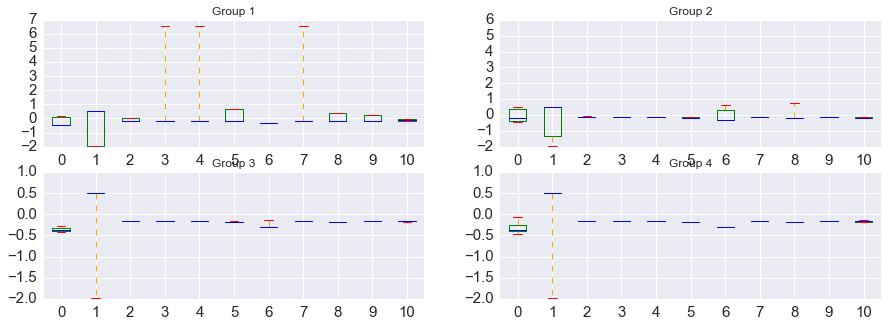

In [33]:
# plot features in each group
color = dict(boxes='Green', whiskers='Orange',
             medians='Blue', caps='Red')
fig, axes = plt.subplots(figsize=(15, 5),nrows=2, ncols=2)
df_train_transform[df_train_transform['label']==0].ix[:,0:-1].plot.box(color=color,
                   ax=axes[0,0],title='Group 1',fontsize=15)
df_train_transform[df_train_transform['label']==1].ix[:,0:-1].plot.box(color=color,
                   ax=axes[0,1],title='Group 2',fontsize=15)
df_train_transform[df_train_transform['label']==2].ix[:,0:-1].plot.box(color=color,
                   ax=axes[1,0],title='Group 3',fontsize=15)
df_train_transform[df_train_transform['label']==3].ix[:,0:-1].plot.box(color=color,
                   ax=axes[1,1],title='Group 4',fontsize=15)
plt.show()

### It seems that a number of features (e.g., 2-3, 3-5) are highly correlated

Reasons?

- Most engineered features might be not be predictive
- Seek a better way to label the group

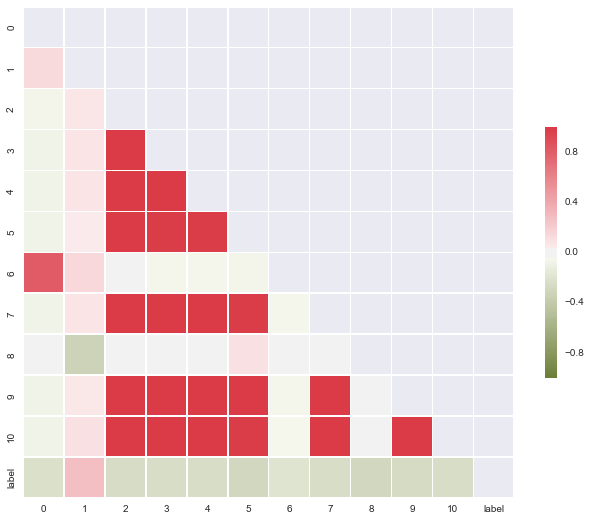

In [34]:
corr = df_train_transform.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(100, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [95]:
#sns.pairplot(df_train_transform, hue='label')

### To further analyze features, I ranked features according to their importance using ExtraTreesClassifier

[ 0.28036582  0.05353362  0.01472121  0.00362181  0.00362181  0.17798176
  0.07845927  0.01110813  0.05400902  0.01107721  0.31150035]


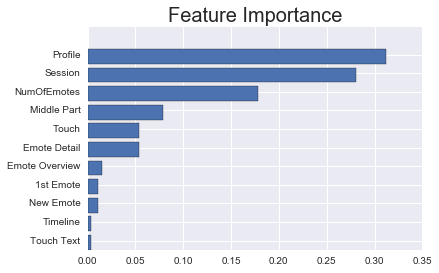

In [37]:
prediction.feat_importance(train)

### Use LDA for prediction

/Users/lanyiyun/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


('1st sample from test dataset classified as:', array([ 1.,  3.,  1.,  3.,  3.,  1.,  3.,  1.,  2.,  1.,  3.,  1.,  1.,
        0.,  3.]))
('actual class label:', 51    3.0
41    3.0
13    1.0
53    3.0
27    1.0
26    1.0
56    3.0
37    2.0
18    1.0
23    1.0
31    1.0
30    1.0
11    1.0
0     0.0
5     0.0
Name: label, dtype: float64)
Confusion Matrix of the LDA-classifier
[[1 0 0 1]
 [0 5 1 2]
 [0 1 0 0]
 [0 1 0 3]]
Normalized confusion matrix
[[ 0.5   0.    0.    0.5 ]
 [ 0.    0.62  0.12  0.25]
 [ 0.    1.    0.    0.  ]
 [ 0.    0.25  0.    0.75]]


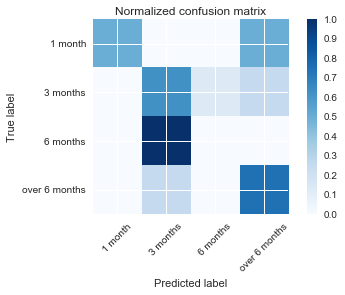

In [38]:
[y_pred, y_test] = prediction.prediction(train_transform, train, test_transform, test)

## average precision is 0.65, recall is 0.6

In [39]:
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

        0.0       1.00      0.50      0.67         2
        1.0       0.71      0.62      0.67         8
        2.0       0.00      0.00      0.00         1
        3.0       0.50      0.75      0.60         4

avg / total       0.65      0.60      0.60        15

